In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as st

%matplotlib inline

References:

http://www.stats.ox.ac.uk/~massa/Lecture%2013.pdf

http://www.physics.csbsju.edu/stats/KS-test.html

The Kolmogorov–Smirnov (KS) test is a non parametric and distribution free test: It makes no assumption about the distribution of data.
The KS test that can be used to compare a sample with with a reference probability distribution, or to compare two samples. In this first section we are going to justify the need for a KS test and how it can account for shortcomings from the student t-test.


# Limitations of the t-Test
There are situations where we ought to doubt the results of a t-test. The t-test assumes that situations produce normal data that differ only in the sense that the average outcome in one situation is different from the average outcome of the other situation.

That being said, if we apply the t-test to data drawn from a non-normal distribution, we are probably increasing the risk of errors. Per the Central Limit Thoerem (CLM), the t-test becomes more robust as the control/treatment groups become sufficiently large. However the t-test can still fail in situations where we have a "large" enough sample, the t-test might still be misleading such as observations drawn from a Cauchy distribution.

## Control and Treatment Groups: do not differ in mean, but only in some other way.

In [2]:
group_a = np.random.normal(loc=0, scale=1.0, size=20)
group_b = np.random.normal(loc=0, scale=3.0, size=20)

print('group a: \n{}'.format(np.sort(group_a)))
print('group b: \n{}'.format(np.sort(group_b)))


group a: 
[-0.97079388 -0.95413989 -0.90177231 -0.70069098 -0.54403825 -0.13770138
 -0.10252937 -0.00285294  0.01758009  0.16207195  0.31834302  0.38965001
  0.5493813   0.61040347  0.71767742  0.78448463  1.13705956  1.2974565
  1.51649989  1.56767805]
group b: 
[-5.34251149 -4.6976321  -3.57041166 -2.64338191 -2.5386026  -2.03129269
 -1.8100265  -1.65670432 -0.22010996  0.54380836  0.98609358  1.6089591
  1.72254245  2.00266741  2.11424044  2.25389876  3.03823579  3.29064309
  3.80891106  7.7445923 ]


In [3]:
group_a.mean()

0.2376883444898575

In [4]:
group_b.mean()

0.23019595649474806

In [5]:
ttest_ind(group_a, group_b, equal_var=False)

Ttest_indResult(statistic=0.010006789306280215, pvalue=0.992109030731323)

In [6]:
#try again with really large samples and t-test should work
ttest_ind(np.random.normal(loc=0, scale=1.0, size=100_000),
          np.random.normal(loc=0, scale=2.0, size=100_000),
          equal_var=False)

Ttest_indResult(statistic=-0.4117133061428273, pvalue=0.6805501693553474)

If the null hypothesis was that two samples are similar, a p-value higher than 0.05 is not statistically significant and indicates weak evidence against the null hypothesis. 
This means we fail to reject the null hypothesis and cannot accept the alternative hypothesis.

##  Small Datasets Different in Mean

In [7]:
#samples from lognormal
lognorm_a = np.random.lognormal(mean=3, sigma=10, size=20)
print('group a: \n{}'.format(np.sort(lognorm_a)))

lognorm_b = np.random.lognormal(mean=8, sigma=10, size=20)
print('group a: \n{}'.format(np.sort(lognorm_b)))


group a: 
[2.46812903e-10 1.41435549e-05 1.93299715e-05 1.00099302e-04
 2.09122679e-02 8.30697505e-02 1.52185336e-01 2.62255886e-01
 1.54658693e+00 4.45408822e+00 5.35992154e+00 2.13335192e+01
 2.21845112e+01 1.35029663e+02 1.75857665e+02 3.61089054e+02
 3.96366104e+04 5.37437501e+05 1.54855891e+06 7.58763687e+09]
group a: 
[1.65610610e-02 2.56249394e-02 1.27557023e+00 1.30845541e+00
 3.46085171e+00 3.94132103e+00 5.43618029e+01 1.06720265e+02
 9.14666801e+02 1.07959439e+05 1.81185715e+05 8.33465043e+05
 8.59010088e+05 1.45324185e+06 3.93570437e+06 7.85812745e+06
 1.21356898e+07 2.23484787e+07 4.83806159e+08 4.96111847e+11]


In [8]:
ttest_ind(lognorm_a, lognorm_b)

Ttest_indResult(statistic=-0.9857169568227586, pvalue=0.3305070116594748)

Again, these are different distributions yet we fail to reject the null hypothesis.

# Implement the KS Test

Suppose we have observations x1, x2, ...xn that we think come from a distribution P. The KS test is used to evaluate:
- Null Hypothesis: The samples do indeed come from P
- Alternative Hypothesis: The amples do not come from P

To build intution for the KS test, we take a step back and consider descriptive statistics. Distributions sucha s the normal distribution are known to have a mean of 0 and a standard deviation of 1. Therefore we expect no more than 15% of the data to lie below the mean.

In this task we will use the Cumulative Distribution Function (CDF). More specifically, we will use the Empirical Distribution Function (EDF): an estimate of the cumulative distribution function that generated the points in the sample.


In the first example we want to compare the empirical distribution function of the observed data, with the cumulative distribution function associated with the null hypothesis (normal distribution).


In [9]:
#generate random aray
arr_1 = np.random.normal(0, 1.0, size=100)

The cumulative distribution function uniquely characterizes a probability distribution.
We want to compare the empirical distribution function of the data, **F_obs**, with the cumulative distribution function associated with the null hypothesis, **F_exp** (expected CDF).

In [10]:
arr_1_edf = np.arange(1/len(arr_1), 1+1/len(arr_1), 1/len(arr_1))

In [11]:
arr_1_edf

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [12]:
#sort
arr_1_sorted = np.sort(arr_1)
#get cdf based on norm distribution
cdf_null_hyp = [st.norm.cdf(x) for x in arr_1_sorted]

In [13]:
#calculate absolute difference
arr_dif_abs = np.abs(cdf_null_hyp-arr_1_edf)
#get max different
dn_ks = max(arr_dif_abs)
dn_ks

0.06868004577947195

In [14]:
dn_crit = 1.36/np.sqrt(len(arr_1))
dn_crit

0.136

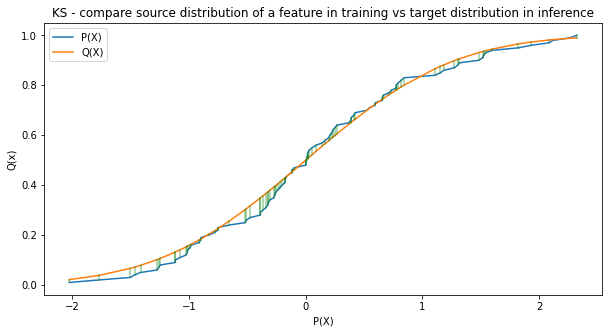

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(arr_1_sorted, arr_1_edf, label='P(X)')
plt.plot(arr_1_sorted, cdf_null_hyp, label='Q(X)')
for x, y1, y2 in zip(arr_1_sorted, arr_1_edf, cdf_null_hyp):
    plt.plot([x, x], [y1, y2], color='green', alpha=0.4)
plt.legend()
plt.ylabel("Q(x)")
plt.xlabel('P(X)')
plt.title("KS - compare source distribution of a feature in training vs target distribution in inference")
plt.show()

# KS For Two Samples

Given two samples, test if their distributions are the same.Compute the observed cumulative distribution functions of the two samples and compute their maximum difference.

## Copy From Reference

In [16]:
x =[1.2, 1.4, 1.9, 3.7, 4.4, 4.8, 9.7, 17.3, 21.1, 28.4]
y = [5.6, 6.5, 6.6, 6.9, 9.2, 10.4, 10.6, 19.3]

x_y = np.sort(np.concatenate((x, y)))
x_y

array([ 1.2,  1.4,  1.9,  3.7,  4.4,  4.8,  5.6,  6.5,  6.6,  6.9,  9.2,
        9.7, 10.4, 10.6, 17.3, 19.3, 21.1, 28.4])

In [17]:
x_cdf = [np.round(st.percentileofscore(x, samp)/100, 1) for samp in x_y]
y_cdf = [np.round(st.percentileofscore(y, samp)/100, 1) for samp in x_y]

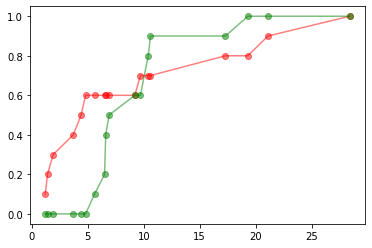

In [18]:
plt.plot(x_y, x_cdf, label='x', alpha=0.5, marker='o', color='red')
plt.plot(x_y, y_cdf, label='y', alpha=0.5, marker='o', color='green')
plt.show()

In [19]:
abs_diff_example = np.abs(np.subtract(x_cdf, y_cdf))
abs_diff_example

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.5, 0.4, 0.2, 0.1, 0. , 0.1, 0.1,
       0.2, 0.1, 0.2, 0.1, 0. ])

In [20]:
print(max(abs_diff_example))

0.6


In [21]:
def d_crit_two_way(arr1, arr2):
    return 1.36*np.sqrt(len(arr1)**-1 + len(arr2)**-1)

In [22]:
d_crit_two_way(x, y)

0.6451046426743494

## Try Our Own Sample

In [23]:
#generate random samples from lognormal and sort
samp_a = np.sort(np.random.normal(loc=0.0, scale=1.0, size=20))
print("samp_a:\n{}".format(samp_a))
print(20*'-')

#generate random samples from lognormal and sort
samp_b = np.sort(np.random.lognormal(mean=0, sigma=1.0, size=25))
print("samp_b:\n{}".format(samp_b))
print(20*'-')

#concatenate and sort
samp_conc = np.sort(np.concatenate((samp_a, samp_b)))
print("samp_conc:\n{}".format(samp_conc))


samp_a:
[-0.99562132 -0.90693358 -0.77291593 -0.69620218 -0.68727212 -0.50394572
 -0.50171551 -0.14922154  0.05597985  0.17528132  0.26611568  0.38908849
  0.46657441  0.48971484  0.57112858  0.78727729  0.82241018  1.12095296
  2.15263562  3.43157191]
--------------------
samp_b:
[0.20876835 0.21523294 0.34064515 0.50948899 0.54329128 0.7934646
 0.83983136 0.84158413 0.87009294 0.89999479 1.03371359 1.35265447
 1.55344261 1.727699   1.74974813 1.82604357 2.04220273 2.36096382
 2.36674949 2.50146852 2.57592482 2.80999311 2.92221053 3.35493259
 6.29533371]
--------------------
samp_conc:
[-0.99562132 -0.90693358 -0.77291593 -0.69620218 -0.68727212 -0.50394572
 -0.50171551 -0.14922154  0.05597985  0.17528132  0.20876835  0.21523294
  0.26611568  0.34064515  0.38908849  0.46657441  0.48971484  0.50948899
  0.54329128  0.57112858  0.78727729  0.7934646   0.82241018  0.83983136
  0.84158413  0.87009294  0.89999479  1.03371359  1.12095296  1.35265447
  1.55344261  1.727699    1.74974813  1.8

In [24]:
#cdf of sample a
samp_a_cdf = [np.round(st.percentileofscore(samp_a, value)/100, 1) for value in samp_conc]
print('samp_a_cdf:\n{}'.format(samp_a_cdf))
print(20*'-')

#cdf of sample b
samp_b_cdf = [np.round(st.percentileofscore(samp_b, value)/100, 1) for value in samp_conc]
print('samp_b_cdf:\n{}'.format(samp_b_cdf))
print(20*'-')

#compute absolute difference
samp_diff = np.abs(np.subtract(samp_a_cdf, samp_b_cdf))
print('samp_diff:\n{}'.format(samp_diff))

samp_a_cdf:
[0.0, 0.1, 0.2, 0.2, 0.2, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
--------------------
samp_b_cdf:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0, 1.0]
--------------------
samp_diff:
[0.  0.1 0.2 0.2 0.2 0.3 0.4 0.4 0.4 0.5 0.5 0.4 0.5 0.5 0.5 0.5 0.6 0.5
 0.5 0.6 0.6 0.6 0.6 0.5 0.5 0.4 0.4 0.4 0.5 0.4 0.4 0.3 0.3 0.3 0.2 0.3
 0.3 0.2 0.2 0.2 0.1 0.1 0.  0.  0. ]


In [25]:
print(max(samp_diff))

0.6000000000000001


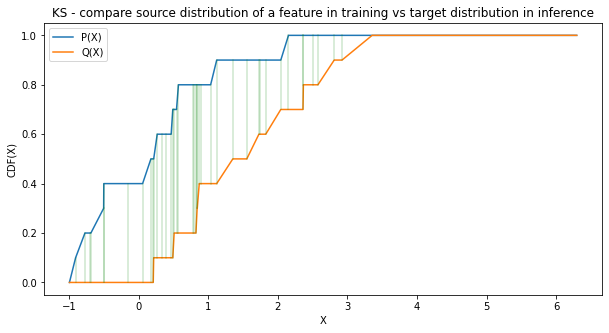

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(samp_conc, samp_a_cdf, label='P(X)')
plt.plot(samp_conc, samp_b_cdf, label='Q(X)')

for val, p1, p2 in zip(samp_conc, samp_a_cdf, samp_b_cdf):
    plt.plot([val, val], [p1, p2], color='green', alpha=0.2)

plt.legend()
plt.ylabel("CDF(X)")
plt.xlabel('X')
plt.title("KS - compare source distribution of a feature in training vs target distribution in inference")

plt.show()

In [27]:
d_crit_two_way(samp_a, samp_b)

0.40800000000000003